In [2]:
!pip install timm transformers datasets accelerate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.1 MB/s eta 0:00:00


In [4]:
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
zip_path="/content/drive/MyDrive/Research_project/TrashNeXt Dataset.zip"
extract_path = "/content"


In [6]:
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)
!ls {extract_path}

Dataset extracted to: /content
 drive	 __MACOSX   sample_data  'TrashNeXt Dataset'


In [2]:
import os
from PIL import Image
from tqdm import tqdm

def is_corrupted_image(file_path):
    """Check if an image file is corrupted."""
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify integrity
        return False
    except (IOError, SyntaxError, Image.DecompressionBombError):
        return True

def remove_corrupted_images(dataset_path):
    """Scan and remove corrupted images + hidden macOS files."""
    corrupted_count = 0
    total_images = 0

    for root, _, files in os.walk(dataset_path):
        for file in tqdm(files, desc=f"Scanning {os.path.basename(root)}"):

            # Skip hidden files (.DS_Store, ._files)
            if file.startswith("."):
                file_path = os.path.join(root, file)
                try:
                    os.remove(file_path)
                    corrupted_count += 1
                    print(f"Removed hidden file: {file_path}")
                except:
                    pass
                continue

            # Check only image formats
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                total_images += 1
                file_path = os.path.join(root, file)
                if is_corrupted_image(file_path):
                    try:
                        os.remove(file_path)
                        corrupted_count += 1
                        print(f"Removed corrupted image: {file_path}")
                    except Exception as e:
                        print(f"Error removing {file_path}: {e}")

    print("\n✅ Scan completed!")
    print(f"📷 Total images scanned: {total_images}")
    print(f"🗑️ Corrupted/hidden files removed: {corrupted_count}")

# Run the cleaner
dataset_path = '/content/dataset'  # Your dataset path
remove_corrupted_images(dataset_path)


Scanning dataset: 0it [00:00, ?it/s]
Scanning Train: 0it [00:00, ?it/s]
Scanning organic: 100%|██████████| 2391/2391 [00:00<00:00, 8794.05it/s]
Scanning Valid: 0it [00:00, ?it/s]
Scanning organic: 100%|██████████| 299/299 [00:00<00:00, 9055.44it/s]
Scanning Test: 0it [00:00, ?it/s]
Scanning organic: 100%|██████████| 299/299 [00:00<00:00, 10012.11it/s]


✅ Scan completed!
📷 Total images scanned: 23625
🗑️ Corrupted/hidden files removed: 0


In [3]:
from PIL import Image
import os

def remove_truncated_images(dataset_path):
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    img_path = os.path.join(root, file)
                    img = Image.open(img_path)
                    img.verify()
                except Exception as e:
                    print(f"Removing corrupted/truncated: {img_path}")
                    os.remove(img_path)

remove_truncated_images("/content/dataset")


In [4]:
import os

dataset_path = "/content/dataset"  # Your dataset path
splits = ["Train", "Valid", "Test"]

for split in splits:
    print(f"\n{split.upper()} Split:")
    split_path = os.path.join(dataset_path, split)

    for cls in sorted(os.listdir(split_path)):
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            num_images = len([f for f in os.listdir(cls_path) if not f.startswith(".")])
            print(f"  {cls}: {num_images} images")



TRAIN Split:
  cardboard: 1886 images
  e-waste: 2404 images
  foam_rubber: 2289 images
  glass: 2009 images
  medical: 1565 images
  metal: 2065 images
  organic: 2391 images
  paper: 2155 images
  plastic: 2135 images

VALID Split:
  cardboard: 236 images
  e-waste: 301 images
  foam_rubber: 287 images
  glass: 251 images
  medical: 196 images
  metal: 258 images
  organic: 299 images
  paper: 269 images
  plastic: 267 images

TEST Split:
  cardboard: 235 images
  e-waste: 301 images
  foam_rubber: 287 images
  glass: 252 images
  medical: 196 images
  metal: 258 images
  organic: 299 images
  paper: 270 images
  plastic: 267 images


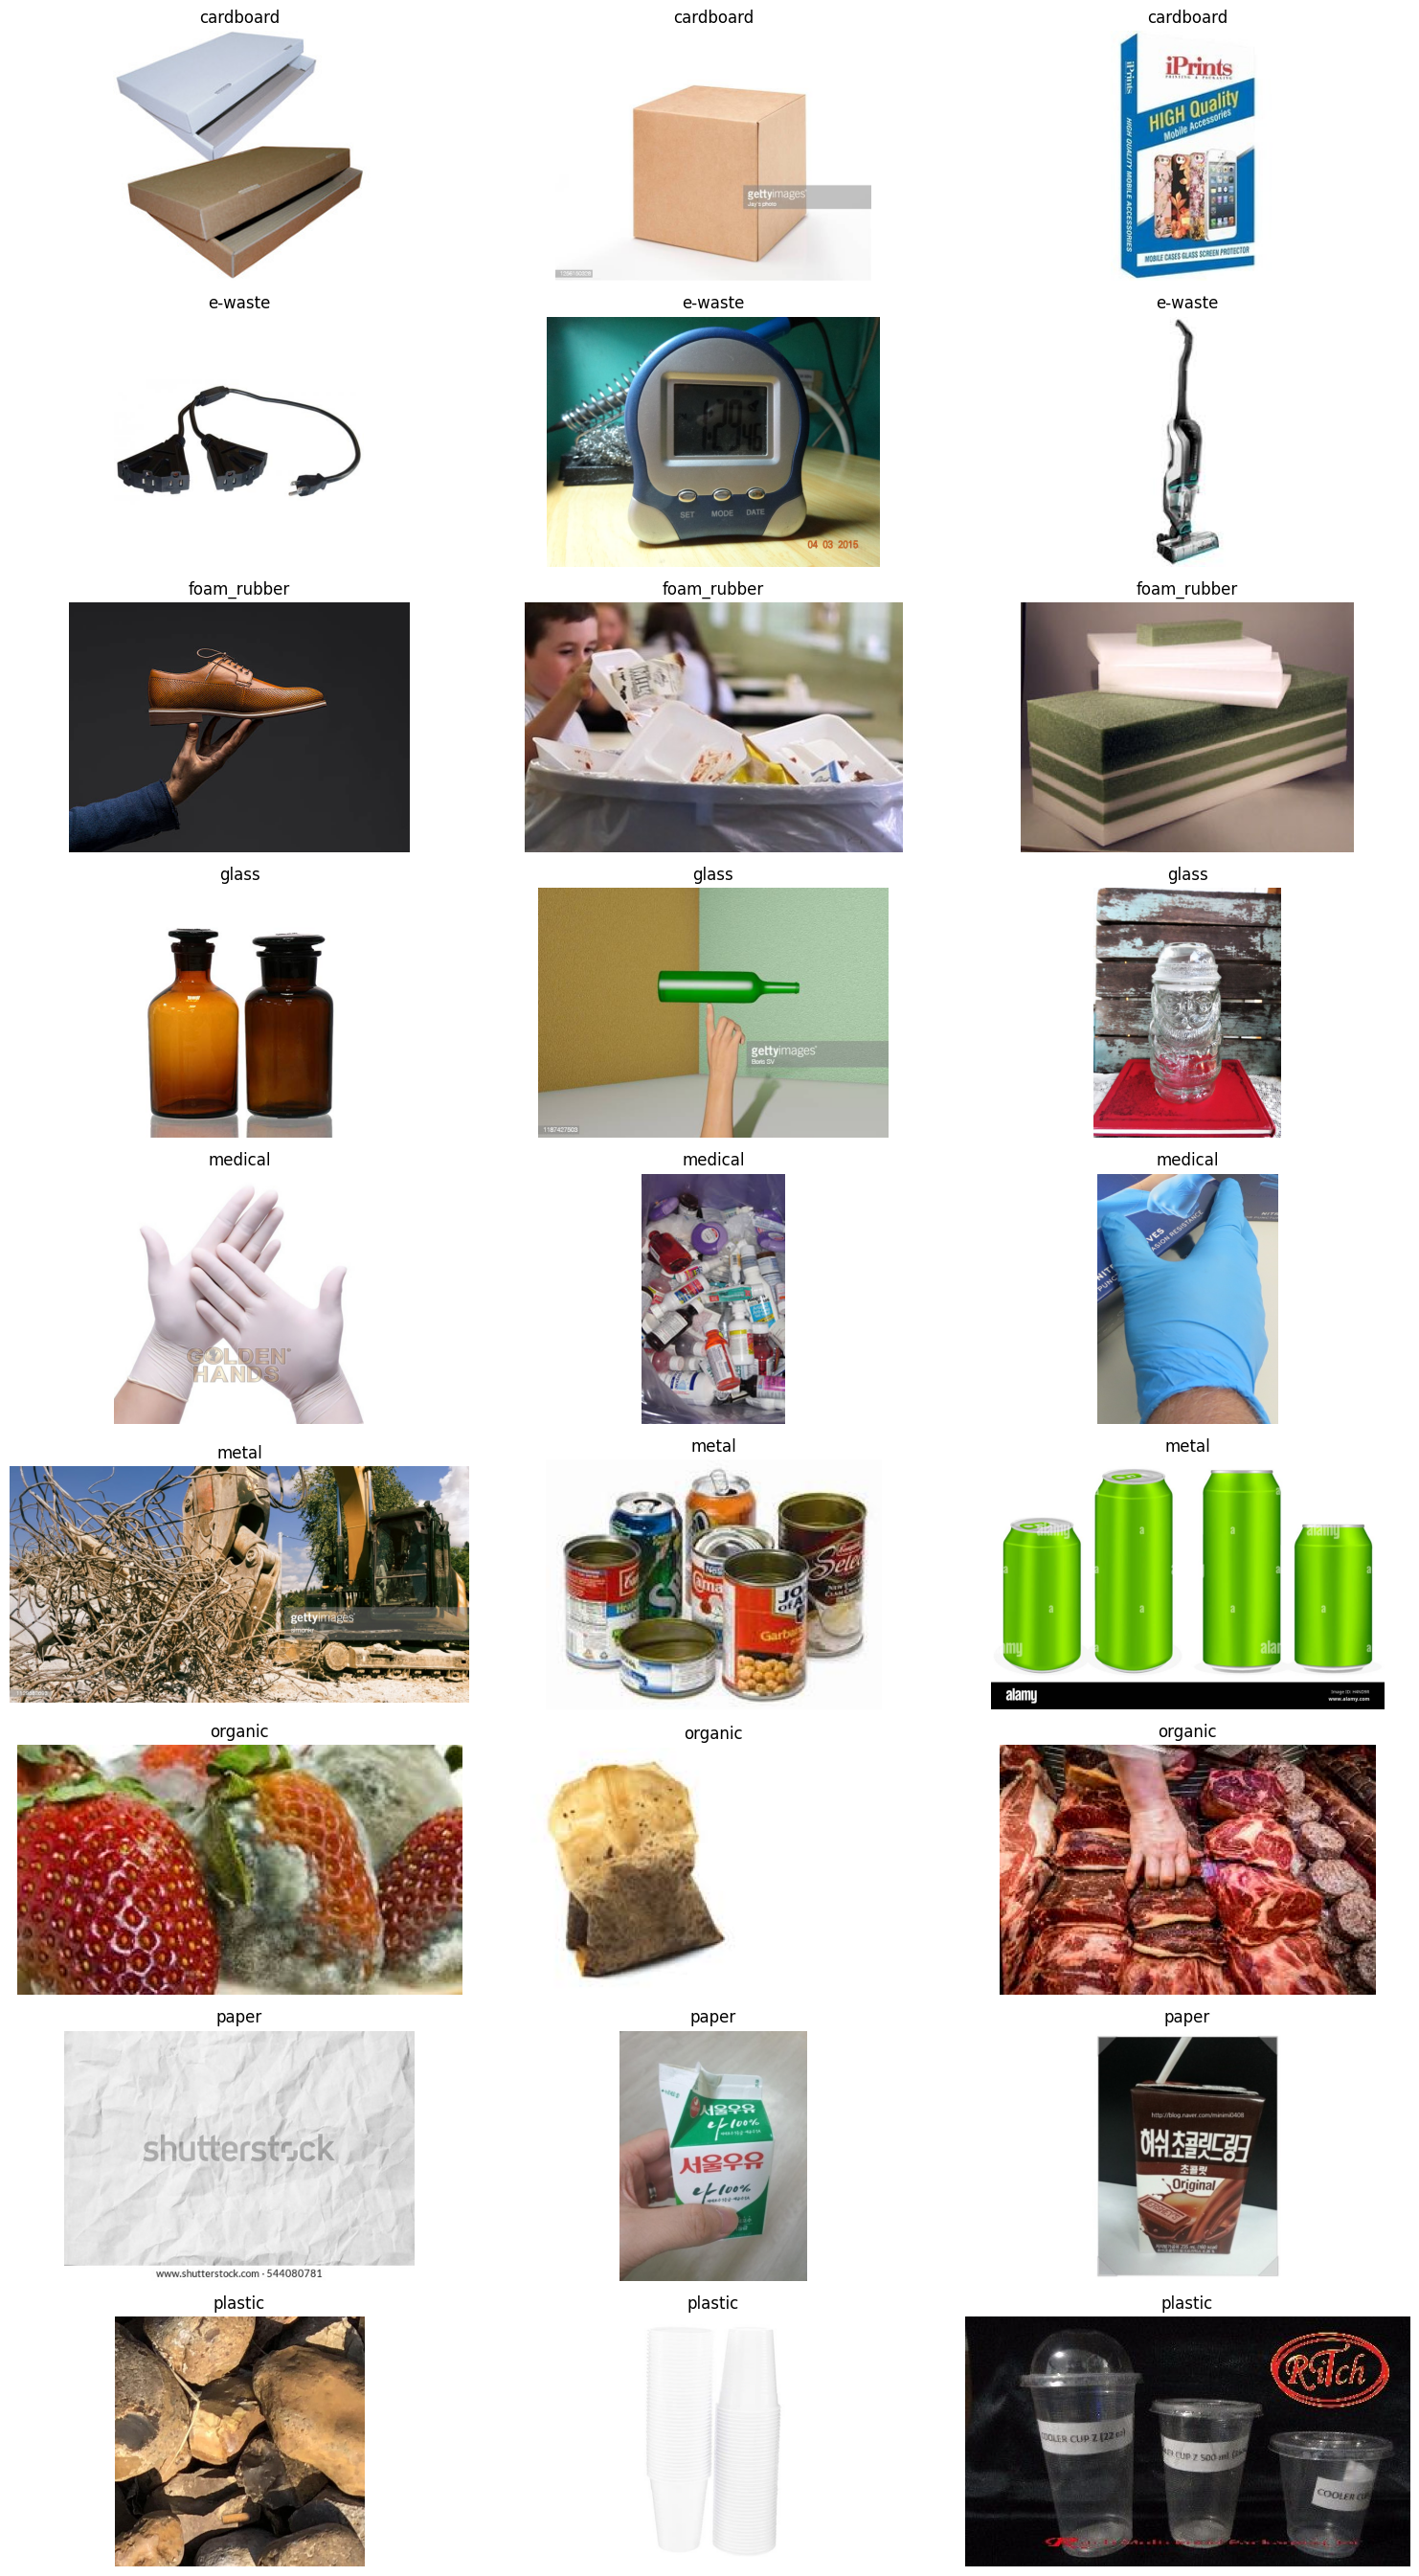

In [5]:
import matplotlib.pyplot as plt
import random
from PIL import Image

dataset_path = "/content/dataset"
split = "Train"  # Change to "Valid" or "Test" if needed
classes = sorted(os.listdir(os.path.join(dataset_path, split)))

# Show a few random images from each class
num_images_per_class = 3
plt.figure(figsize=(15, len(classes) * 3))

img_index = 1
for cls in classes:
    cls_path = os.path.join(dataset_path, split, cls)
    if os.path.isdir(cls_path):
        sample_files = random.sample(os.listdir(cls_path), min(num_images_per_class, len(os.listdir(cls_path))))

        for file in sample_files:
            img_path = os.path.join(cls_path, file)
            try:
                img = Image.open(img_path)
                plt.subplot(len(classes), num_images_per_class, img_index)
                plt.imshow(img)
                plt.title(cls)
                plt.axis("off")
                img_index += 1
            except:
                print(f"⚠️ Could not open {img_path}")

plt.tight_layout()
plt.show()


In [6]:
import os
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

dataset_path = "/content/dataset"
BATCH_SIZE = 64
IMAGE_SIZE = 224

# Define transforms
train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

valid_test_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(root=f"{dataset_path}/Train", transform=train_transform)
valid_dataset = datasets.ImageFolder(root=f"{dataset_path}/Valid", transform=valid_test_transform)
test_dataset  = datasets.ImageFolder(root=f"{dataset_path}/Test",  transform=valid_test_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False)

# Print class names
print(f"Classes: {train_dataset.classes}")
print(f"Number of classes: {len(train_dataset.classes)}")


Classes: ['cardboard', 'e-waste', 'foam_rubber', 'glass', 'medical', 'metal', 'organic', 'paper', 'plastic']
Number of classes: 9


In [7]:
import torch
from transformers import LevitForImageClassification, AutoImageProcessor

model_name = "facebook/levit-128S"

# Load processor
processor = AutoImageProcessor.from_pretrained(model_name)

# Load model without classifier size mismatch error
model = LevitForImageClassification.from_pretrained(
    model_name,
    ignore_mismatched_sizes=True,  # <-- Fix: allows head replacement
    num_labels=len(train_dataset.classes)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"✅ Model initialized for {len(train_dataset.classes)} classes on {device}")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Some weights of LevitForImageClassification were not initialized from the model checkpoint at facebook/levit-128S and are newly initialized because the shapes did not match:
- classifier.linear.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([9]) in the model instantiated
- classifier.linear.weight: found shape torch.Size([1000, 384]) in the checkpoint and torch.Size([9, 384]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model initialized for 9 classes on cuda


In [8]:
# ✅ One-batch forward pass test
import torch

# Get one batch
images, labels = next(iter(train_loader))

print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")

# Move to device
images, labels = images.to(device), labels.to(device)

# Forward pass
with torch.no_grad():
    outputs = model(pixel_values=images)

# Check outputs
print(f"Logits shape: {outputs.logits.shape}")  # Should be (batch_size, 9)
print(f"Predicted class indices: {torch.argmax(outputs.logits, dim=-1)}")


Image batch shape: torch.Size([64, 3, 224, 224])
Label batch shape: torch.Size([64])
Logits shape: torch.Size([64, 9])
Predicted class indices: tensor([0, 0, 2, 6, 0, 2, 3, 4, 8, 6, 4, 4, 7, 4, 6, 2, 4, 3, 6, 0, 4, 3, 2, 1,
        7, 7, 2, 1, 1, 7, 6, 4, 4, 1, 3, 3, 2, 4, 5, 2, 5, 2, 4, 4, 1, 1, 7, 6,
        7, 5, 0, 1, 6, 5, 2, 1, 1, 1, 8, 0, 0, 6, 4, 1], device='cuda:0')


In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
import torch
from tqdm import tqdm

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
epochs = 10  # Change as needed

for epoch in range(epochs):
    # ---- Training ----
    model.train()
    total_loss = 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1} - Training"):
        images, labels = images.to(device), labels.to(device)

        outputs = model(pixel_values=images, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)

    # ---- Validation ----
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(pixel_values=images)
            preds = outputs.logits.argmax(dim=-1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_accuracy = correct / total

    print(f"\nEpoch [{epoch+1}/{epochs}]")
    print(f"Training Loss: {avg_train_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy*100:.2f}%")


Epoch 1 - Training:   3%|▎         | 8/296 [00:18<13:21,  2.78s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1 - Training: 100%|██████████| 296/296 [05:27<00:00,  1.11s/it]



Epoch [1/10]
Training Loss: 1.8546
Validation Accuracy: 65.34%


Epoch 2 - Training: 100%|██████████| 296/296 [05:02<00:00,  1.02s/it]



Epoch [2/10]
Training Loss: 1.2171
Validation Accuracy: 74.61%


Epoch 3 - Training: 100%|██████████| 296/296 [05:01<00:00,  1.02s/it]



Epoch [3/10]
Training Loss: 0.8316
Validation Accuracy: 82.27%


Epoch 4 - Training: 100%|██████████| 296/296 [04:50<00:00,  1.02it/s]



Epoch [4/10]
Training Loss: 0.5935
Validation Accuracy: 86.42%


Epoch 5 - Training: 100%|██████████| 296/296 [04:48<00:00,  1.02it/s]



Epoch [5/10]
Training Loss: 0.4551
Validation Accuracy: 87.69%


Epoch 6 - Training: 100%|██████████| 296/296 [04:45<00:00,  1.04it/s]



Epoch [6/10]
Training Loss: 0.3642
Validation Accuracy: 89.00%


Epoch 7 - Training: 100%|██████████| 296/296 [04:42<00:00,  1.05it/s]



Epoch [7/10]
Training Loss: 0.2980
Validation Accuracy: 89.63%


Epoch 8 - Training: 100%|██████████| 296/296 [04:40<00:00,  1.05it/s]



Epoch [8/10]
Training Loss: 0.2430
Validation Accuracy: 89.80%


Epoch 9 - Training: 100%|██████████| 296/296 [04:41<00:00,  1.05it/s]



Epoch [9/10]
Training Loss: 0.2055
Validation Accuracy: 90.39%


Epoch 10 - Training: 100%|██████████| 296/296 [04:43<00:00,  1.04it/s]



Epoch [10/10]
Training Loss: 0.1722
Validation Accuracy: 91.07%


In [11]:
# ✅ Final Test Accuracy
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(pixel_values=images)
        preds = outputs.logits.argmax(dim=-1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_accuracy = correct / total
print(f"✅ Final Test Accuracy: {test_accuracy*100:.2f}%")


✅ Final Test Accuracy: 90.14%


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


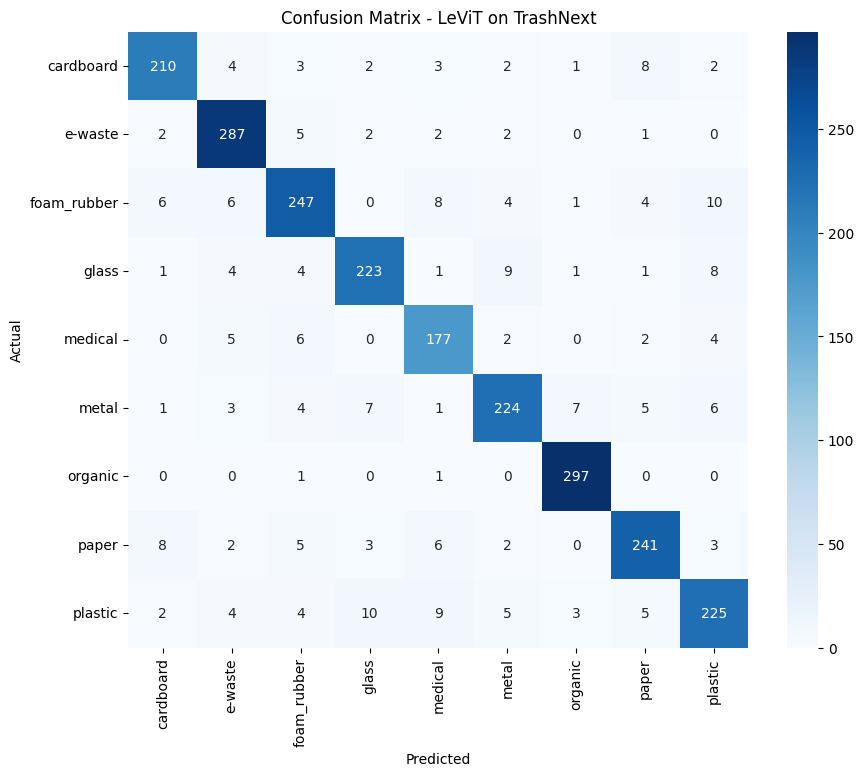


📊 Class-wise Accuracy:
cardboard: 89.36%
e-waste: 95.35%
foam_rubber: 86.36%
glass: 88.49%
medical: 90.31%
metal: 86.82%
organic: 99.33%
paper: 89.26%
plastic: 84.27%

📋 Classification Report:
              precision    recall  f1-score   support

   cardboard       0.91      0.89      0.90       235
     e-waste       0.91      0.95      0.93       301
 foam_rubber       0.89      0.86      0.87       286
       glass       0.90      0.88      0.89       252
     medical       0.85      0.90      0.88       196
       metal       0.90      0.87      0.88       258
     organic       0.96      0.99      0.98       299
       paper       0.90      0.89      0.90       270
     plastic       0.87      0.84      0.86       267

    accuracy                           0.90      2364
   macro avg       0.90      0.90      0.90      2364
weighted avg       0.90      0.90      0.90      2364



In [12]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# ✅ Get class names from dataset
class_names = train_dataset.classes

# ✅ Collect all predictions & labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(pixel_values=images)
        preds = outputs.logits.argmax(dim=-1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ✅ Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LeViT on TrashNext")
plt.show()

# ✅ Class-wise Accuracy
class_correct = cm.diagonal()
class_total = cm.sum(axis=1)
class_accuracy = class_correct / class_total

print("\n📊 Class-wise Accuracy:")
for cls, acc in zip(class_names, class_accuracy):
    print(f"{cls}: {acc*100:.2f}%")

# ✅ Detailed report (Precision, Recall, F1)
print("\n📋 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))


In [14]:
# Switch to eval mode
model.eval()

# Example input for tracing
example_input = torch.randn(1, 3, 224, 224).to(device)

# Trace the model
traced_model = torch.jit.trace(model, example_input, strict=False) # Add strict=False

# Save TorchScript
traced_model.save("levit_trashnext_rpi.pt")

print("✅ TorchScript model saved as levit_trashnext_rpi.pt")

/usr/local/lib/python3.11/dist-packages/transformers/models/levit/modeling_levit.py:114: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if num_channels != self.num_channels:


✅ TorchScript model saved as levit_trashnext_rpi.pt
